In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/train.xlsx')
test = pd.read_excel('/content/test.xlsx')

In [ ]:
data = data.drop(columns = 'Unnamed: 0')

In [ ]:
data.head(5)

,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


Уберем столбцы, где почти все пропуски, т.к. они не несут в себе важную информацию, а так же ФИО не влияет на зарплату

In [ ]:
data = data.drop(columns = ['Desc_Education_5', 'Desc_Education_6', 'Education_5', 'Education_6', 'Ученая степень 2', 'Ученое звание 2', 'ФИО'])
test = test.drop(columns = ['Desc_Education_5', 'Desc_Education_6', 'Education_5', 'Education_6', 'Ученая степень 2', 'Ученое звание 2', 'ФИО'])

Заполним пропуски

In [ ]:
data.isna().sum()

предмет                0
ФИО                    0
tutor_head_tags        0
tutor_rating         589
tutor_reviews          0
description            1
experience_desc        0
Education_1            0
Desc_Education_1      76
Education_2         3767
Desc_Education_2    3771
Education_3         4442
Desc_Education_3    4443
Education_4         4532
Desc_Education_4    4532
Ученая степень 1    4472
Ученое звание 1     4513
status                13
experience            25
Desc_Education_5    4545
Desc_Education_6    4547
Education_5         4545
Education_6         4547
Ученая степень 2    4547
Ученое звание 2     4547
categories             0
mean_price             0
dtype: int64

Если tutor_rating пропущена, то это должен быть новый пользователь и рейтинга у него нет

In [ ]:
data['tutor_rating']

0       5.0
1       4.0
2       0.0
3       4.0
4       0.0
       ... 
4543    4.0
4544    0.0
4545    0.0
4546    0.0
4547    0.0
Name: tutor_rating, Length: 4548, dtype: float64

In [ ]:
data['tutor_rating'] = data['tutor_rating'].fillna(0)

test['tutor_rating'] = test['tutor_rating'].fillna(0)

Если description пропущено, то можем просто заемнить его пустой строкой

In [ ]:
data['description'] = data['description'].fillna('')

test['description'] = test['description'].fillna('')

Аналогично с experience_description и desc_eductation

In [ ]:
data['experience_desc'] = data['experience_desc'].fillna('')
data['Desc_Education_1'] = data['Desc_Education_1'].fillna('')
data['Desc_Education_2'] = data['Desc_Education_2'].fillna('')
data['Desc_Education_3'] = data['Desc_Education_3'].fillna('')
data['Desc_Education_4'] = data['Desc_Education_4'].fillna('')

test['experience_desc'] = test['experience_desc'].fillna('')
test['Desc_Education_1'] = test['Desc_Education_1'].fillna('')
test['Desc_Education_2'] = test['Desc_Education_2'].fillna('')
test['Desc_Education_3'] = test['Desc_Education_3'].fillna('')
test['Desc_Education_4'] = test['Desc_Education_4'].fillna('')

Если какое-то из образований пропущено, то, скорее всего, его просто нет

In [ ]:
data['Education_2'] = data['Education_2'].fillna('')
data['Education_3'] = data['Education_3'].fillna('')
data['Education_4'] = data['Education_4'].fillna('')
data['Ученая степень 1'] = data['Ученая степень 1'].fillna('')
data['Ученое звание 1'] = data['Ученое звание 1'].fillna('')

test['Education_2'] = test['Education_2'].fillna('')
test['Education_3'] = test['Education_3'].fillna('')
test['Education_4'] = test['Education_4'].fillna('')
test['Ученая степень 1'] = test['Ученая степень 1'].fillna('')
test['Ученое звание 1'] = test['Ученое звание 1'].fillna('')

data['status'] = data['status'].fillna('')

test['status'] = test['status'].fillna('')

Если experience не указан, тог можем предположин, что это новый репетитор без опыта работы

In [ ]:
data['experience'] = data['experience'].fillna('0 лет')

test['experience'] = test['experience'].fillna('0 лет')

In [ ]:
data.isna().sum()

предмет             0
tutor_head_tags     0
tutor_rating        0
tutor_reviews       0
description         0
experience_desc     0
Education_1         0
Desc_Education_1    0
Education_2         0
Desc_Education_2    0
Education_3         0
Desc_Education_3    0
Education_4         0
Desc_Education_4    0
Ученая степень 1    0
Ученое звание 1     0
status              0
experience          0
categories          0
mean_price          0
dtype: int64

Закодируем eperience_desc, 0 значит, что описание отстутствует, а 1 обратное

In [ ]:
data['experience_desc'] = np.where(data['experience_desc'].isnull(), 0, 1)

Преобразуем опыт работы в int для следующей аналитики

In [ ]:
data['experience'] = data['experience'].fillna('0 лет')
data['experience'] = data['experience'].str.extract(r'(\d+)')
data['experience'] = data['experience'].astype(int)

С помощью OHE закодируем предмет



In [ ]:
data['предмет'] = data['предмет'].replace({'matematika': 1, 'informatika': 0})

Есть гипотеза, что чем больше образований у человека, тем больше стоят его услуги, проверим:

In [ ]:
data['Count'] = data[['Education_1', 'Education_2', 'Education_3', 'Education_4']].count(axis=1)

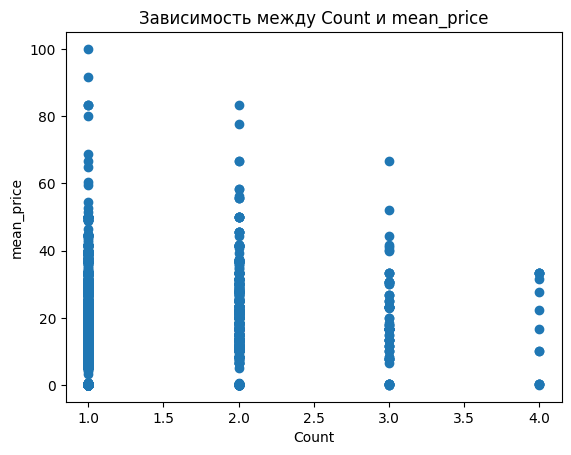

In [ ]:
plt.scatter(data['Count'], data['mean_price'])
plt.xlabel('Count')
plt.ylabel('mean_price')
plt.title('Зависимость между Count и mean_price')
plt.show()

Видим, что количество образований, в целом, не влияет на ценообразование. Наоборот, высшие точки достигаются обратным образом - чем меньше образований, тем выше максимальная цена в этой категории, однако это можно списать на количество людей в выборке

In [ ]:
data.describe()

,предмет,tutor_rating,tutor_reviews,experience_desc,experience,mean_price,Count
count,4548.000000,3959.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,0.810246,1.895933,2.989006,0.477353,10.388962,16.197949,1.198549
std,0.392149,2.280103,8.516939,0.499542,9.556758,10.485108,0.468894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,1.000000
25%,1.000000,0.000000,0.000000,0.000000,4.000000,10.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,7.000000,15.000000,1.000000
75%,1.000000,4.000000,2.000000,1.000000,13.000000,20.888889,1.000000
max,1.000000,5.000000,152.000000,1.000000,68.000000,100.000000,4.000000


Предположим, что наш таргет распределен нормально, тогда будет гораздо проще работать с ним, проверим:

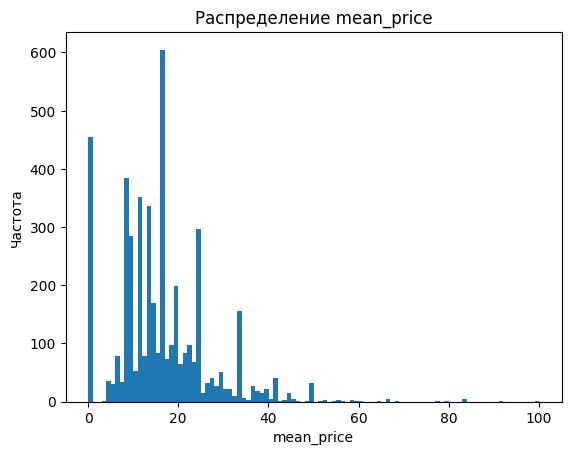

In [ ]:
import matplotlib.pyplot as plt


plt.hist(data['mean_price'], bins=100)
plt.xlabel('mean_price')
plt.ylabel('Частота')
plt.title('Распределение mean_price')
plt.show()

По графику отчетливо видно, что распределение цены не нормально

Есть гипотеза, что преподаватели с высоким рейтингом (>= 4) в среднем ставят большую цену, проверим:

In [ ]:
from scipy import stats

prices_high_rating = data[data['tutor_rating'] >= 4]['mean_price']
prices_low_rating = data[data['tutor_rating'] < 4]['mean_price']

t_statistic, p_value = stats.ttest_ind(prices_high_rating, prices_low_rating, equal_var=False)

print("t-статистика:", t_statistic)
print("p-значение:", p_value)


t-статистика: 6.752493672069277
p-значение: 1.7061218767842568e-11


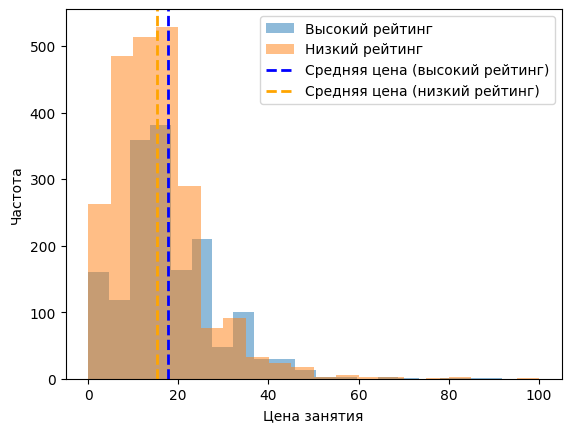

In [ ]:
plt.hist(prices_high_rating, bins=20, alpha=0.5, label='Высокий рейтинг')
plt.hist(prices_low_rating, bins=20, alpha=0.5, label='Низкий рейтинг')

plt.axvline(prices_high_rating.mean(), color='blue', linestyle='dashed', linewidth=2, label='Средняя цена (высокий рейтинг)')
plt.axvline(prices_low_rating.mean(), color='orange', linestyle='dashed', linewidth=2, label='Средняя цена (низкий рейтинг)')

plt.xlabel('Цена занятия')
plt.ylabel('Частота')
plt.legend()

plt.show()


Видим, что t-статистика значительно больше 0, а p-значение меньше обычного уровня значимости 0.05, значит рейтинг репетитора влияет на ценообразование и цена у репетиторов с бОльшим рейтингом больше. Так же, мы это видим и по графику

Рассмотрим ещё одну гипотезу: репетиторы с описанием своего опыта ставят бОльшую цену, чем люди без этого критерия

In [ ]:
from scipy import stats

prices_with_experience = data[data['experience_desc'] == 1]['mean_price']
prices_without_experience = data[data['experience_desc'] == 0]['mean_price']

t_statistic, p_value = stats.ttest_ind(prices_with_experience, prices_without_experience, equal_var=False)

print("t-статистика:", t_statistic)
print("p-значение:", p_value)


t-статистика: 14.587737909233836
p-значение: 5.281709050314982e-47


Видим, что гипотеза подтвердилась и наличие описания опыта у репетитора увеличивает цену на его услуги, изобразим это:

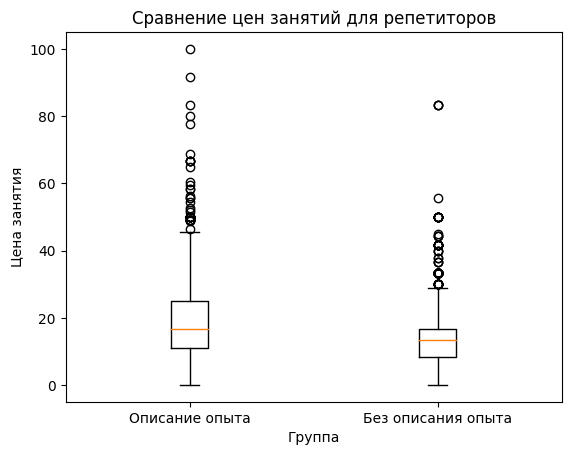

In [ ]:
import matplotlib.pyplot as plt

prices_with_experience = data[data['experience_desc'] == 1]['mean_price']
prices_without_experience = data[data['experience_desc'] == 0]['mean_price']

group_labels = ['Описание опыта', 'Без описания опыта']

plt.boxplot([prices_with_experience, prices_without_experience], labels=group_labels)

plt.xlabel('Группа')
plt.ylabel('Цена занятия')
plt.title('Сравнение цен занятий для репетиторов')

plt.show()
